# Plag-Liq and Kspar-Liq Matching
- This notebook shows how to assess all possible matches for Plag-Liq and Kspar-Liq pairs where there aren't obvious pairwise analyses
- You can download the excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Feldspar_Thermobarometry/Feldspar_Liquid.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## Example 1 - Plag and Liquid. 

In [2]:
## Load in the liquids
out_Liq=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Liq_only")
Liqs=out_Liq['Liqs']
# Load in the Plags
out_Plag=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Plag_only")
Plags=out_Plag['Plags']

In [3]:
## Inspect them to check they read in right
display(Plags.head())
display(Liqs.head())

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1
1,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,Plag2
2,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,Plag3_core
3,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,Plag4
4,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,Plag5


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,Glass1
1,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,Glass2
2,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,Glass3
3,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,Glass4
4,48.1,3.88,13.2,16.4,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.0,0.0,0.0,0.0,0.0,Glass5


## Example 1a - All possible Liq - Plag matches
- By default, unlike Opx-Liq, Cpx-Opx and Cpx-Liq no equilibrium tests are automatically applied, so all pairs are returned
- We then show how to filter using the suggested equilibrium test of Putirka (Kd -Ab-An = 0.1+-0.05 at T<1050 C, and 0.28+-0.11 at T>1050 C)

In [4]:
melt_match=pt.calculate_fspar_liq_temp_matching(liq_comps=Liqs, plag_comps=Plags, 
                                             equationT="T_Put2008_eq24a", P=5, 
                                                eq_tests=True, H2O_Liq=2)
melt_match.head()

Considering 672 liq-spar pairs, be patient if this is >>1 million!
here


,T_K_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_liq,Sample_ID_liq,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,Kd_Ab_An,ID_Plag,P,T
0,1335.5853,High T: No,0.129654,0.204526,0.029143,0.546783,0.349131,0.000072,0.510102,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,2,0.0,0.0,0.0,0.0,Glass1,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,0.0,0.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1335.5853
1,1345.416757,High T: No,0.15203,0.187752,0.028957,0.569159,0.365905,0.000258,0.528284,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,2,0.0,0.0,0.0,0.0,Glass2,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,1.0,1.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1345.416757
2,1348.554558,High T: No,0.149771,0.165942,0.028756,0.566899,0.387714,0.000459,0.497189,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,2,0.0,0.0,0.0,0.0,Glass3,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,2.0,2.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1348.554558
3,1312.15466,Low T: Yes,0.075656,0.138144,0.029192,0.492785,0.415513,0.000023,0.547239,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,2,0.0,0.0,0.0,0.0,Glass4,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,3.0,3.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1312.15466
4,1324.654278,High T: No,0.058904,0.095579,0.028989,0.476033,0.458077,0.000226,0.459646,48.1,3.88,13.2,16.4,0.16,4.02,6.51,3.36,1.36,0.0,1.59,2,0.0,0.0,0.0,0.0,Glass5,0.531999,0.066283,0.

### Lets filter to only include ones where we pass the equilibrium test suggested by Putirka (2008)

In [5]:
# This says find me the rows where the column "Pass An-Ab Eq Test Put2008?" contains the word yes
melt_match_filt=melt_match.loc[melt_match['Pass An-Ab Eq Test Put2008?'].str.contains('Yes')]

In [6]:
## We can look at these rows here
melt_match_filt.head()

,T_K_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_liq,Sample_ID_liq,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,Kd_Ab_An,ID_Plag,P,T
3,1312.15466,Low T: Yes,0.075656,0.138144,0.029192,0.492785,0.415513,0.000023,0.547239,47.1,4.21,12.0,17.80,0.18,3.40,7.28,2.93,2.02,0.0,2.32,2,0.0,0.0,0.0,0.0,Glass4,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,3.0,3.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1312.15466
9,1325.536331,High T: Yes,0.05185,0.127863,0.029156,0.468979,0.425793,0.000059,0.339536,57.8,1.87,13.7,9.35,0.20,3.41,6.33,3.82,1.94,0.0,0.30,2,0.0,0.0,0.0,0.0,Glass10,0.626884,0.055134,0.001837,0.084806,0.073559,0.087560,0.040164,0.013421,0.015256,0.001377,0.0,0.548684,0.048257,0.001608,0.074227,0.064383,0.153275,0.070308,0.023494,0.013353,0.002411,0.0,0.393976,0.393976,9.0,9.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1325.536331
10,1330.27983,High T: Yes,0.064157,0.139638,0.029158,0.481285,0.414018,0.000057,0.365696,57.9,1.77,13.8,9.45,0.19,3.67,6.78,3.82,1.81,0.0,0.37,2,0.0,0.0,0.0,0.0,Glass11,0.621396,0.058717,0.001727,0.084816,0.077964,0.087276,0.039744,0.012391,0.014289,0.001681,0.0,0.544562,0.051457,0.001514,0.074329,0.068324,0.152970,0.069659,0.021717,0.012522,0.002946,0.0,0.409076,0.409076,10.0,10.0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0.510102,0,5,1330.27983
27,1317.667273,Low T: Yes,0.044052,0.108882,0.028309,0.497177,0.409661,0.000023,0.471818,47.1,4.21,12.0,17.80,0.18,3.40,7.28,2.93,2.02,0.0,2.32,2,0.0,0.0,0.0,0.0,Glass4,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,3.0,3.0,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,Plag2,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,0.455475,1,5,1317.667273
30,1343.498926,High T: Yes,0.057711,0.066192,0.02777,0.510835,0.452351,0.000562,0.376943,49.5,4.23,14.8,14.00,0.16,4.63,6.36,3.76,1.04,0.0,0.69,2,0.0,0.0,0.0,0.0,Glass7,0.540

## Example 1b - Iterating T and H2O for all possible Plag-Liq matches

In [10]:
T_H_Iter=pt.calculate_fspar_liq_temp_hygr_matching(liq_comps=Liqs, plag_comps=Plags,
        equationT="T_Put2008_eq24a", equationH="H_Waters2015", P=5)
T_H_Calc=T_H_Iter.get('T_H_calc')

Considering 672 liq-spar pairs, be patient if this is >>1 million!


C:\Users\penny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3251: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  exec(code_obj, self.user_global_ns, self.user_ns)


### Again, lets filter using the equilibrium test of Putirka (2008)

In [11]:
T_H_Calc_Filter=T_H_Calc.loc[T_H_Calc['Pass An-Ab Eq Test Put2008?'].str.contains('Yes')]

Text(0.5, 0, 'H$_2$O Calc (wt%)')

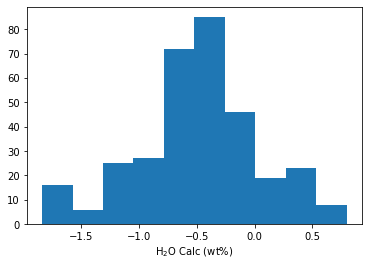

In [12]:
# Maybe you want to plot a histogram of H2O contents
plt.hist(T_H_Calc_Filter['H2O_calc'])
plt.xlabel('H$_2$O Calc (wt%)')

## Example 2 - Kspar-Liquid calculations

In [13]:
# Load in the Kspars
out_Kspar=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Kspar_only")
Kspars=out_Kspar['Kspars']

# Load in the liquids you want to match with
out_Liq2=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Evolved_Liq_only")
Liqs=out_Liq2['Liqs']

### 2a - Lets calculate temperature for all liq-kspar matches
- Currently no equilibrium tests exist for Kspar-Liquid that we are aware off. If you know of ones I can implement, please reach out!

In [14]:
melt_match_2=pt.calculate_fspar_liq_temp_matching(liq_comps=Liqs, kspar_comps=Kspars, 
                                             equationT="T_Put2008_eq24b", P=5, 
                                                eq_tests=True, H2O_Liq=2)
melt_match_2

Considering 225 liq-spar pairs, be patient if this is >>1 million!
Sorry, no equilibrium tests implemented for Kspar-Liquid. Weve just returned the major elements


,T_K_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_liq,Sample_ID_liq,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar,Si_Kspar_cat_prop,Mg_Kspar_cat_prop,Fet_Kspar_cat_prop,Ca_Kspar_cat_prop,Al_Kspar_cat_prop,Na_Kspar_cat_prop,K_Kspar_cat_prop,Mn_Kspar_cat_prop,Ti_Kspar_cat_prop,Cr_Kspar_cat_prop,sum,Si_Kspar_cat_frac,Mg_Kspar_cat_frac,Fet_Kspar_cat_frac,Ca_Kspar_cat_frac,Al_Kspar_cat_frac,Na_Kspar_cat_frac,K_Kspar_cat_frac,Mn_Kspar_cat_frac,Ti_Kspar_cat_frac,Cr_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,Kd_Ab_An,ID_Plag,Sample_ID_Plag
0,1204.761608,61.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,7.09,0.0,0.02,2,0.0,0.0,0.0,0.0,0,0.697922,0.003878,0.002586,0.029982,0.019873,0.123696,0.066990,0.051148,0.003828,0.000096,0.0,0.561966,0.003122,0.002083,0.024142,0.016002,0.199200,0.107880,0.082368,0.003082,0.000154,0.0,0.114521,0.114521,0.0,0.0,65.5,0.0,19.6,0.07,0.0,0.0,0.75,4.81,9.36,0.0,Kspar1,1.090135,0.0,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.0,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.03641,0.422555,0.541035,0.610191,0,0.0
1,1204.761608,61.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,7.09,0.0,0.02,2,0.0,0.0,0.0,0.0,1,0.697922,0.003878,0.002586,0.029982,0.019873,0.123696,0.066990,0.051148,0.003828,0.000096,0.0,0.561966,0.003122,0.002083,0.024142,0.016002,0.199200,0.107880,0.082368,0.003082,0.000154,0.0,0.114521,0.114521,1.0,1.0,65.5,0.0,19.6,0.07,0.0,0.0,0.75,4.81,9.36,0.0,Kspar1,1.090135,0.0,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.0,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.03641,0.422555,0.541035,0.610191,0,0.0
2,1133.124071,62.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,6.09,0.0,0.02,2,0.0,0.0,0.0,0.0,2,0.706339,0.003862,0.002576,0.029860,0.019792,0.123192,0.066717,0.043754,0.003813,0.000095,0.0,0.572510,0.003130,0.002088,0.024203,0.016042,0.199701,0.108152,0.070929,0.003090,0.000155,0.0,0.114521,0.114521,2.0,2.0,65.5,0.0,19.6,0.07,0.0,0.0,0.75,4.81,9.36,0.0,Kspar1,1.090135,0.0,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.0,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.03641,0.422555,0.541035,0.610191,0,0.0
3,1133.124071,62.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,6.09,0.0,0.02,2,0.0,0.0,0.0,0.0,3,0.706339,0.003862,0.002576,0.029860,0.019792,0.123192,0.066717,0.043754,0.003813,0.000095,0.0,0.572510,0.003130,0.002088,0.024203,0.016042,0.199701,0.108152,0.070929,0.003090,0.000155,0.0,0.114521,0.114521,3.0,3.0,65.5,0.0,19.6,0.07,0.0,0.0,0.75,4.81,9.36,0.0,Kspar1,1.090135,0.0,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.0,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.03641,0.422555,0.541035,0.610191,0,0.0
4,1133.124071,62.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,6.09,0.0,0.02,2,0.0,0.0,0.0,0.0,4,0.706339,0.003862,0.002576,0.029860,0.019792,0.123192,0.066717,0.043754,0.003813,0.000095,0.0,0.572510,0.003130,0.002088,0.024203,0.016042,0.199701,0.108152,0.070929,0.003090,0.000155,0.0,0.114521,0.114521,4.0,4.0,65.5,0.0,19.6,0.07,0.0,0.0,0.75,4.81,9.36,0.0,Kspar1,1.090135,0.0,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.0,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.03641,0.422555,0.541035,0.610191,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,